### Loading libraries for the task.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import joblib
pd.set_option('display.max_columns', 81)

### Reading train data and dropping unnecessary column Id.

In [2]:
train = pd.read_csv('train.csv') # read train data
train.drop(['Id'], axis=1, inplace= True) # drop Id column
train.head() # display head

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Reading test data and dropping unnecessary column Id.

In [3]:
test = pd.read_csv('test.csv') # read test data
test.drop(['Id'], axis=1, inplace= True) # drop Id column
test.head() # display head

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Data Preprocessing: Dropping columns that have more than 15% of data missing.

In [4]:
missing_percentage = (train.isnull().sum() / len(train)) * 100 # find the percentage of missing values in data

columns_with_high_missing = missing_percentage[missing_percentage > 15].index.tolist() # find columns having more than 15% missing values

train.drop(columns_with_high_missing,axis=1, inplace= True) # drop these columns from train data
test.drop(columns_with_high_missing,axis=1, inplace= True) # drop these columns from test data

### Data Preprocessing:

- Imputing numerical values with the median
- Imputing categorical values with the mode

In [5]:
numeric_columns = train.select_dtypes(include='number').columns.drop('SalePrice') # select numerical features from data
train[numeric_columns] = train[numeric_columns].fillna(train[numeric_columns].median()) # impute train data with median
test[numeric_columns] = test[numeric_columns].fillna(test[numeric_columns].median()) # impute test data with median


categorical_columns = train.select_dtypes(include='object').columns # select categorical features from data
train[categorical_columns] = train[categorical_columns].fillna(train[categorical_columns].mode().iloc[0]) # impute train with mode
test[categorical_columns] = test[categorical_columns].fillna(test[categorical_columns].mode().iloc[0]) # impute test with mode

### Exploratory Data Analysis: Plot of GrLivArea with SalePrice.

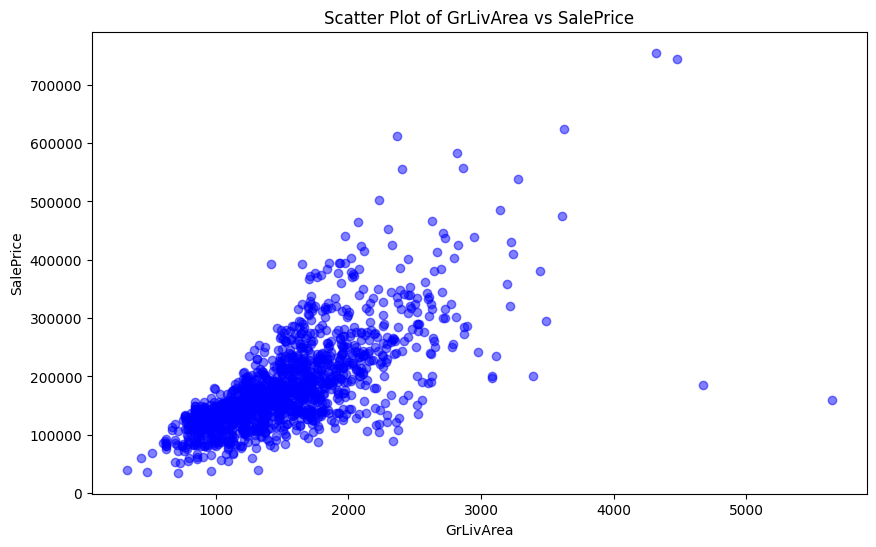

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(train['GrLivArea'], train['SalePrice'], alpha=0.5, color='b') # scatter plot of GrLivArea with SalePrice
plt.title('Scatter Plot of GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

### Two data points show an anomaly where the area is >4000 yet prices are low. We locate them and drop them from the data as they are outliers.

In [7]:
train[train['GrLivArea']>4000] ## find out the outlier points

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,0,10,2007,New,Partial,184750
691,60,RL,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,0,1,2007,WD,Normal,755000
1182,60,RL,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,0,7,2007,WD,Abnorml,745000
1298,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,0,1,2008,New,Partial,160000


### Remove outlier points

In [8]:
train = train.drop(index=[523, 1298]) # drop outlier points

### Exploratory Data Analysis: Distribution of Sales Price.

c:\Users\bashs\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


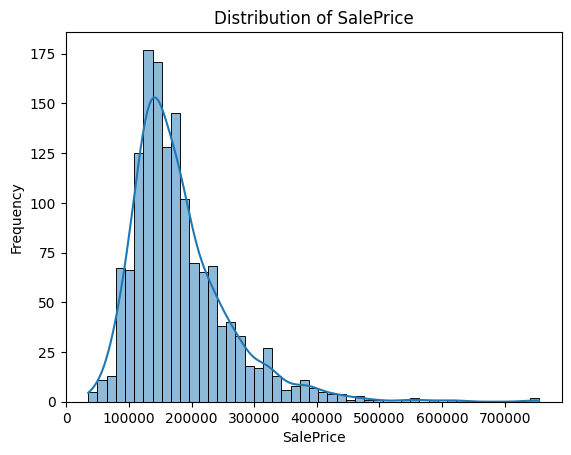

In [9]:
sns.histplot(train['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

### Exploratory Data Analysis: Distribution of GrLivArea.

c:\Users\bashs\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


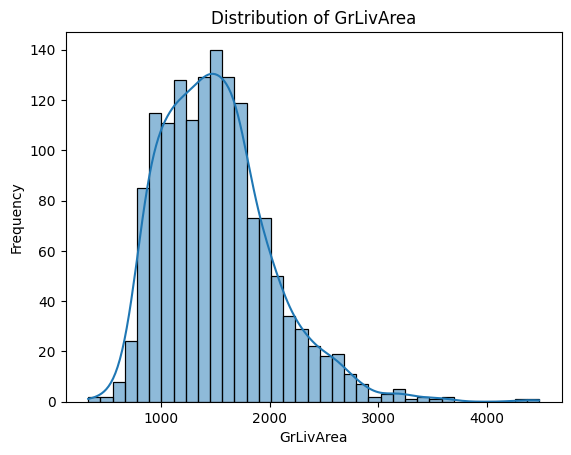

In [10]:
sns.histplot(train['GrLivArea'], kde=True)
plt.title('Distribution of GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('Frequency')
plt.show()

### Exploratory Data Analysis: Box Plot of sales price with overall quality.

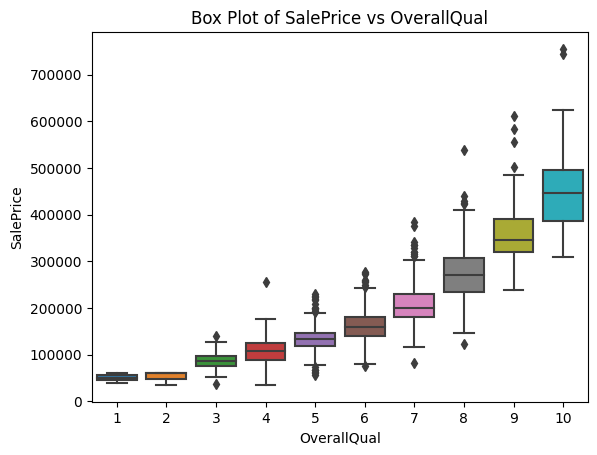

In [11]:
sns.boxplot(x='OverallQual', y='SalePrice', data=train)
plt.title('Box Plot of SalePrice vs OverallQual')
plt.show()

### Exploratory Data Analysis: Box plot of sales price with overall condition.

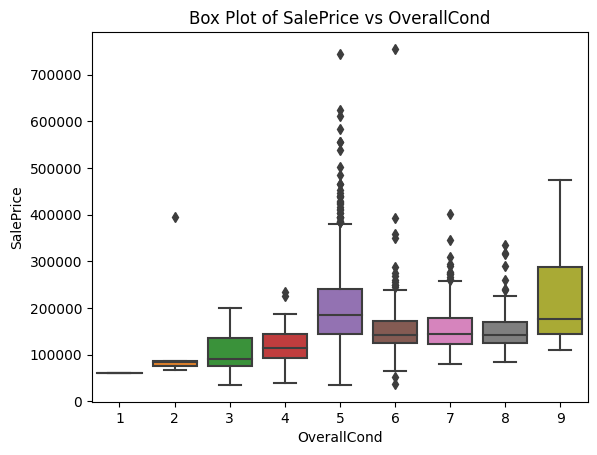

In [12]:
sns.boxplot(x='OverallCond', y='SalePrice', data=train)
plt.title('Box Plot of SalePrice vs OverallCond')
plt.show()

### Exploratory Data Analysis: Heatmap of most correlated features.

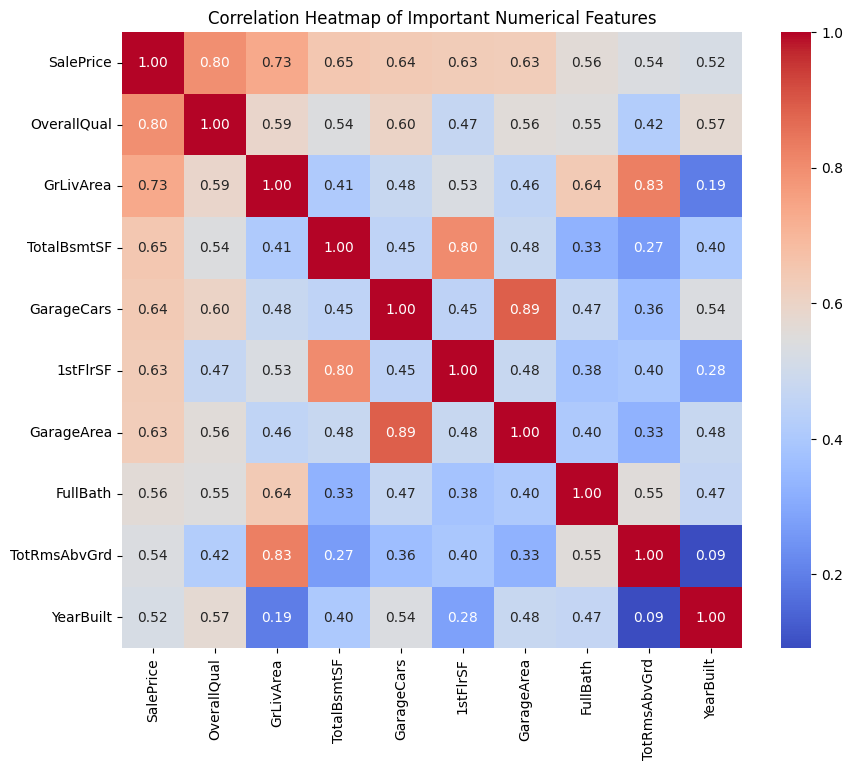

In [13]:
numerical_features = train.select_dtypes(include=['int', 'float']) # select numerical features
important_numerical_features = numerical_features.corr()['SalePrice'].abs().nlargest(10).index # select 10 most correlated features
correlation_matrix = train[important_numerical_features].corr()

## Plotting heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Important Numerical Features')
plt.show()

### Data Preprocessing: Label encoding categorical features

In [14]:
categorical_features = train.select_dtypes(include=['object']).columns # select categorical features

label_encoder = LabelEncoder()

# Fitting LabelEncoder on training data and transform both training and testing data
for feature in categorical_features:
    # Fit on training data
    label_encoder.fit(train[feature])
    
    # Transform training data
    train[feature] = label_encoder.transform(train[feature])
    
    # Transform testing data
    test[feature] = label_encoder.transform(test[feature])

### Data Preprocessing: Scaling numerical features.

In [15]:
numerical_features = train.select_dtypes(include=['int', 'float']).columns # select numerical features


scaler = StandardScaler()

# Fitting StandardScaler on training data and transform both training and testing data
for feature in numerical_features:
    
    if feature not in ['SalePrice']:
        scaler.fit(train[[feature]])
    
    # Transform training data
        train[feature] = scaler.transform(train[[feature]])
    
    # Transform testing data
        test[feature] = scaler.transform(test[[feature]])


### Defining the model with the parameter grids.

In [16]:
models = {
    "Linear Regression": (LinearRegression(), {}),
    "Random Forest": (RandomForestRegressor(), {'n_estimators': [100, 200, 300]}),
    "Gradient Boosting": (GradientBoostingRegressor(), {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.05, 0.01]})
}


### Doing training and validation split and declaring variables for storing results.

In [17]:
test_result = test.copy()

# Splitting training set into training and validation sets with 80-20% ratio.
X_train, X_val, y_train, y_val = train_test_split(train.drop(columns=['SalePrice']), train['SalePrice'], test_size=0.2, random_state=42)

## For storing results
results_dict = {'Model': [], 'RMSE': [], 'MAE': []}

test_errors_rmse = {}
test_errors_mae = {}

### Performing the ML model training in the following steps:

- Looping each model to be trained
- Performing hyperparameter tuning using grid search with 5 fold CV
- Storing the best model and predicting on validation set.
- Storing the prediction for each model on the test data
- Evaluating the RMSE and MAE for each model

In [18]:
# Looping each model top erform grid search and selecting best model
for model_name, (model, param_grid) in models.items():
    
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    
    # Selecting best model
    best_model = grid_search.best_estimator_
    
    # Training best model on the entire training set
    best_model.fit(X_train, y_train)
    
    # Predicting on test set
    y_test_pred = best_model.predict(X_val)
    

    test_predictions = best_model.predict(test)
    test_result['SalesPrice_' + model_name] = test_predictions

    # Test set RMSE and MAE
    test_rmse = mean_squared_error(y_val, y_test_pred, squared=False)
    test_mae = mean_absolute_error(y_val, y_test_pred)
    
    # Storing test errors
    test_errors_rmse[model_name] = test_rmse
    test_errors_mae[model_name] = test_mae
    
    # Storing best model
    joblib.dump(best_model, 'best_model_{}.pkl'.format(model_name))

    results_dict['Model'].append(model_name)
    results_dict['RMSE'].append(test_rmse)
    results_dict['MAE'].append(test_mae)


test.to_csv('test_with_predictions.csv', index=False)

### Displaying results data.

In [19]:
results_df = pd.DataFrame(results_dict)
results_df


,Model,RMSE,MAE
0,Linear Regression,25754.875952,18840.058246
1,Random Forest,24207.888585,16722.584760
2,Gradient Boosting,21155.814175,14925.770087


### Plotting histogram of RMSE for all three models

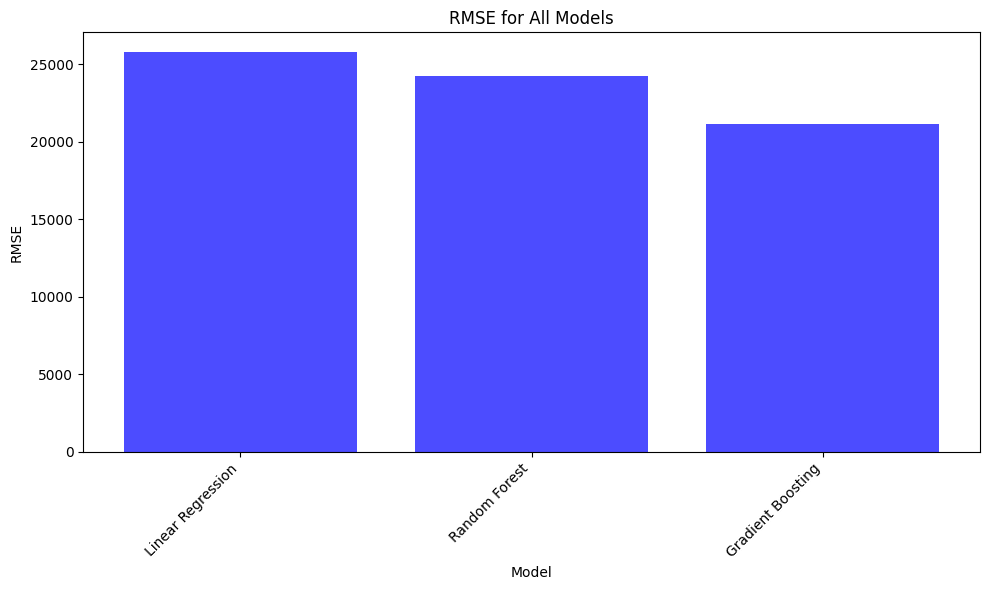

In [20]:

plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['RMSE'], color='blue', alpha=0.7)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE for All Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Plotting histogram of MAE for all three models

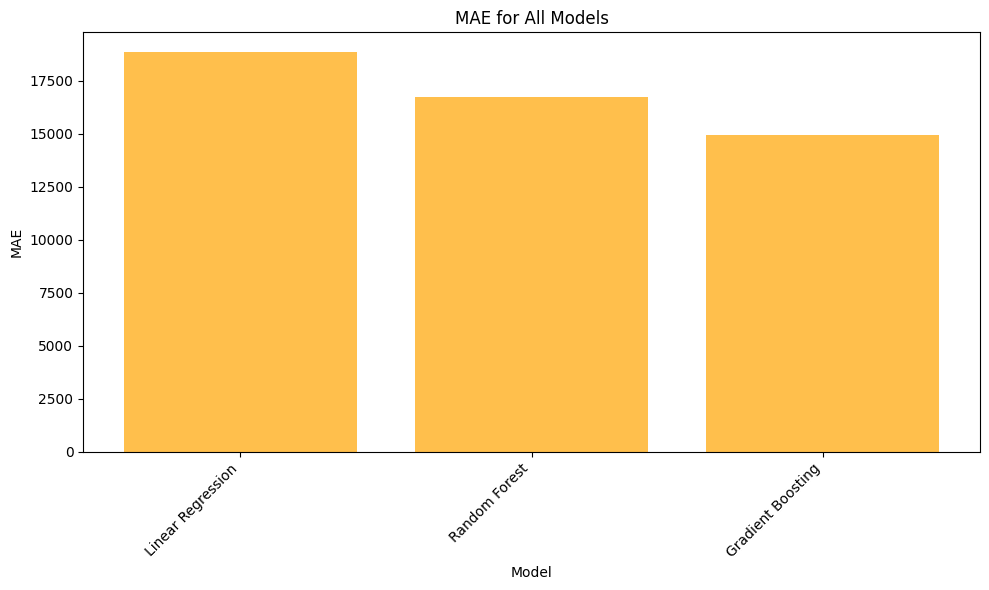

In [21]:
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['MAE'], color='orange', alpha=0.7)
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('MAE for All Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()